<div style=" padding: 10px; font-size: 45px; text-align: center;">
<strong>  Tiamat üßå: </strong> 
<div style=" padding: 10px; font-size: 36px; text-align: center;">
<strong> Treinamento do modelo & Fun√ß√£o objetivo üéØ</strong> 

<div style=" padding: 10px; font-size: 17px; text-align: center;">
<strong>Autores:</strong> Glauber Nascimento de Oliveira, J√∫lia Guedes A. dos Santos & Lorena Ribeiro Nascimento
<div style=" padding: 10px; font-size: 17px; text-align: center;">
<strong>Professor:</strong> Daniel R. Cassar


<div style="background-color: lightblue; font-size: 18px; padding: 10px;">
<div style="text-align: justify"><strong>Objetivo:</strong> Treinamento da rede neural utilizada na fun√ß√£o objetivo </div>

## üí°**Introdu√ß√£o**

<p align="justify">
O presente notebook faz parte de um conjunto de atividades referentes a implementa√ß√£o de um algoritmo gen√©tico para a descoberta de propriedades que levem a um aumento da dureza de um material. Nesse arquivo, em espec√≠fico, modelos foram treinados e avaliados para a composi√ß√£o da fun√ß√£o objetivo que ser√° utilizada para a evolu√ß√£o do algoritmo gen√©tico no notebook "5.2 - Implementa√ß√£o do Algoritmo Gen√©tico".
</p>

<p align="justify">
Aqui o desempenho de dois tipos de algoritmos de Aprendizado de m√°quina (k-NN e √Årvores de Decis√£o) ser√£o avaliados e, o que obtiver o menor valor de Root Mean Squeared Error (RMSE), ser√° utilizado para a composi√ß√£o da fun√ß√£o objetivo. Essa, por sua vez, ir√° computar a previs√£o com base nas <em>features</em> do candidato.
</p>


## üìö**Importa√ß√£o de bibliotecas & Dataset**

Em primeiro lugar, precisamos importar as bibliotecas necess√°rias para a resolu√ß√£o do problema, assim como o dataset mencionado na introdu√ß√£o ("Mineral_Dataset_Supplementary_Info.csv"). Para evitar a presen√ßa de dados faltantes, o dropna ser√° executado, assim como a exclus√£o da coluna referente aos ind√≠ces do dados. 

In [6]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns 

import matplotlib.pyplot as plt 

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [7]:
minerais = pd.read_csv("Mineral_Dataset_Supplementary_Info.csv").dropna().drop(columns=["Unnamed: 0"])
display(minerais)

Hardness  allelectrons_Total  density_Total  allelectrons_Average  \
0         2.3               110.0      23.000000             36.666667   
1         5.5               406.0      30.472136              9.902439   
2         5.5               406.0      30.472464             10.410256   
3         5.5               476.0      61.142136             11.609756   
4         5.5               476.0      61.142464             12.205128   
..        ...                 ...            ...                   ...   
617       3.8                46.0       9.133000             23.000000   
618       4.5                86.0       6.674328             14.333333   
619       4.0                38.0       7.134332             19.000000   
620       7.5                86.0       8.841328             14.333333   
621       6.0               226.0      18.204400             10.272727   

     val_e_Average  atomicweight_Average  ionenergy_Average  \
0         2.666667             82.598467           8.504133   
1         4.682927             19.813180          11.456151   
2         4.923077             20.931371          11.541405   
3         4.682927             23.659644          11.487395   
4         4.923077             24.975089          11.574251   
..             ...                   ...                ...   
617       4.000000             48.719500           9.877100   
618       5.166667             30.645954          11.862733   
619       4.000000             40.689515          11.506150   
620       5.000000             30.550687          11.543000   
621       4.727273             20.652175          11.148755   

     el_neg_chi_Average  R_vdw_element_Average  R_cov_element_Average  \
0              2.146667               2.006667               1.253333   
1              2.700244               1.676829               0.868293   
2              2.753590               1.703846               0.894359   
3              2.763659               1.714634               0.848780   
4              2.820256               1.743590               0.873846   
..                  ...                    ...                    ...   
617            2.115000               1.905000               1.120000   
618            2.861667               1.700000               0.901667   
619            2.545000               1.765000               0.920000   
620            2.831667               1.735000               0.890000   
621            2.702273               1.695455               0.875455   

     zaratio_Average  density_Average  
0           0.456803         7.666667  
1           0.522909         0.743223  
2           0.497498         0.781345  
3           0.519474         1.491272  
4           0.493887         1.567755  
..               ...              ...  
617         0.478880         4.566500  
618         0.487172         1.112388  
619         0.479405         3.567166  
620         0.489507         1.473555  
621         0.519605         0.827473  

[622 rows x 12 columns]

A fim de melhorar o desempenho dos modelos, os outliers encontrados no arquivo "An√°lise dos dados & Cria candidato" ser√£o removidos aqui antes do treinamento do modelo.

In [8]:
indices_zeros = minerais.index[minerais["val_e_Average"] == 0].tolist()
print(indices_zeros)
print(len(indices_zeros))
 
indices_zeros2 = minerais.index[minerais["allelectrons_Average"] == 0].tolist()
print(indices_zeros2)
print(len(indices_zeros2))
 
indices_zeros3 = minerais.index[minerais["allelectrons_Total"] == 0].tolist()
print(indices_zeros3)
print(len(indices_zeros3))
 
indices_zeros4 = minerais.index[minerais["ionenergy_Average"] == 0].tolist()
print(indices_zeros4)
print(len(indices_zeros4))
 
indices_zeros5 = minerais.index[minerais["atomicweight_Average"] == 0].tolist()
print(indices_zeros5)
print(len(indices_zeros5))
 
indices_zeros6 = minerais.index[minerais["el_neg_chi_Average"] == 0].tolist()
print(indices_zeros6)
print(len(indices_zeros6))

[150, 156, 317, 387, 388, 389, 390, 391, 392, 552]
10
[150, 156, 317, 387, 388, 389, 390, 391, 392, 552]
10
[150, 156, 317, 387, 388, 389, 390, 391, 392, 552]
10
[150, 156, 317, 387, 388, 389, 390, 391, 392, 552]
10
[150, 156, 317, 387, 388, 389, 390, 391, 392, 552]
10
[150, 156, 317, 387, 388, 389, 390, 391, 392, 552]
10


In [9]:
minerais = minerais.drop(index=[150, 156, 317, 387, 388, 389, 390, 391, 392, 552])
minerais.head(151)

Hardness  allelectrons_Total  density_Total  allelectrons_Average  \
0         2.3               110.0      23.000000             36.666667   
1         5.5               406.0      30.472136              9.902439   
2         5.5               406.0      30.472464             10.410256   
3         5.5               476.0      61.142136             11.609756   
4         5.5               476.0      61.142464             12.205128   
..        ...                 ...            ...                   ...   
146       2.5               552.0      42.521292              7.666667   
147       2.5               564.0      54.029292              7.833333   
148       2.5               720.0     116.129292             10.000000   
149       6.5               222.0      23.348983              8.880000   
151       5.5               106.0      22.239328             15.142857   

     val_e_Average  atomicweight_Average  ionenergy_Average  \
0         2.666667             82.598467           8.504133   
1         4.682927             19.813180          11.456151   
2         4.923077             20.931371          11.541405   
3         4.682927             23.659644          11.487395   
4         4.923077             24.975089          11.574251   
..             ...                   ...                ...   
146       3.888889             15.272095          11.770372   
147       4.055556             15.718351          11.493639   
148       3.888889             20.528928          11.813072   
149       4.400000             17.918277          11.727840   
151       4.000000             31.976189          10.843971   

     el_neg_chi_Average  R_vdw_element_Average  R_cov_element_Average  \
0              2.146667               2.006667               1.253333   
1              2.700244               1.676829               0.868293   
2              2.753590               1.703846               0.894359   
3              2.763659               1.714634               0.848780   
4              2.820256               1.743590               0.873846   
..                  ...                    ...                    ...   
146            2.606111               1.497222               0.762222   
147            2.656111               1.515556               0.735556   
148            2.692778               1.548889               0.735556   
149            2.761200               1.571200               0.748800   
151            2.701429               1.748571               0.914286   

     zaratio_Average  density_Average  
0           0.456803         7.666667  
1           0.522909         0.743223  
2           0.497498         0.781345  
3           0.519474         1.491272  
4           0.493887         1.567755  
..               ...              ...  
146         0.606304         0.590573  
147         0.604317         0.750407  
148         0.601609         1.612907  
149         0.574341         0.933959  
151         0.484111         3.177047  

[151 rows x 12 columns]

Para o split, os dados ser√£o divididos em treino e teste pela fun√ß√£o "train_test_split" da biblioteca scikit-lean, sendo 90% dos dados para treino e 10% para teste.

In [10]:
semente_aleatoria = 71012
tamanho_teste = 0.1

indices = minerais.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=tamanho_teste, random_state=semente_aleatoria, shuffle=True
)

minerais_treino = minerais.loc[indices_treino]
minerais_teste = minerais.loc[indices_teste]

Finalmente, para facilitar a manipula√ß√£o desses dados, esses ser√£o convertidos em arrays Numpy, pelo m√©todo values. 

In [11]:
X_treino = minerais_treino.drop(columns=["Hardness"]).values
X_teste = minerais_teste.drop(columns=["Hardness"]).values

y_treino = minerais_treino["Hardness"].values.ravel()
y_teste = minerais_teste["Hardness"].values.ravel()

## üèãüèª‚Äç‚ôÄÔ∏è**Treinamento dos modelos**

Como mencionado, dois modelos ser√£o treinados: k-NN e √°rvore de decis√£o. Para evitar passos adicionais de otimiza√ß√£o de hiperpar√¢metros, os valores padr√µes do Scikit-Learn ser√£o utilizados. Como principais diferen√ßas dentre os modelos, o k-NN, por ser um modelo baseado em dist√¢ncia, precisar√° de uma normaliza√ß√£o dos dados antes do treinamento. 

In [12]:
knn = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)
knn.fit(X_treino, y_treino)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [13]:
arvore_decisao = DecisionTreeRegressor()
arvore_decisao.fit(X_treino, y_treino)

DecisionTreeRegressor()

## üìä **An√°lise dos resultados**

Com os modelos treinados, podemos validar os resultados a partir de valida√ß√µa cruzada, como o Root Mean Squared Error (RMSE, do portugu√™s Raiz quadrada do erro quadr√°tico m√©dio). 

In [14]:
scores_knn= cross_val_score(knn, X_teste, y_teste, cv=10, scoring="neg_root_mean_squared_error")
RMSE_knn = np.mean(scores_knn)
print(f"A m√©dia das m√©tricas de RMSE do modelo KNN foi de {-RMSE_knn}")

scores_arvore_decisao= cross_val_score(arvore_decisao, X_teste, y_teste, cv=10, scoring="neg_root_mean_squared_error")
RMSE_arvore_decisao = np.mean(scores_arvore_decisao)
print(f"A m√©dia das m√©tricas de RMSE do modelo √°rvore de decisao foi de {-RMSE_arvore_decisao} K.")

A m√©dia das m√©tricas de RMSE do modelo KNN foi de 1.5683407437222647
A m√©dia das m√©tricas de RMSE do modelo √°rvore de decisao foi de 2.093210516575705 K.


A partir do resultado, √© v√°lido considerar que o k-NN foi um melhor modelo em compara√ß√£o a √°rvore de decis√£o. Podemos visualizar esse resultado a partir de um gr√°fico da compara√ß√£o entre os valores reais e previstos.

In [15]:
y_pred = knn.predict(X_teste)

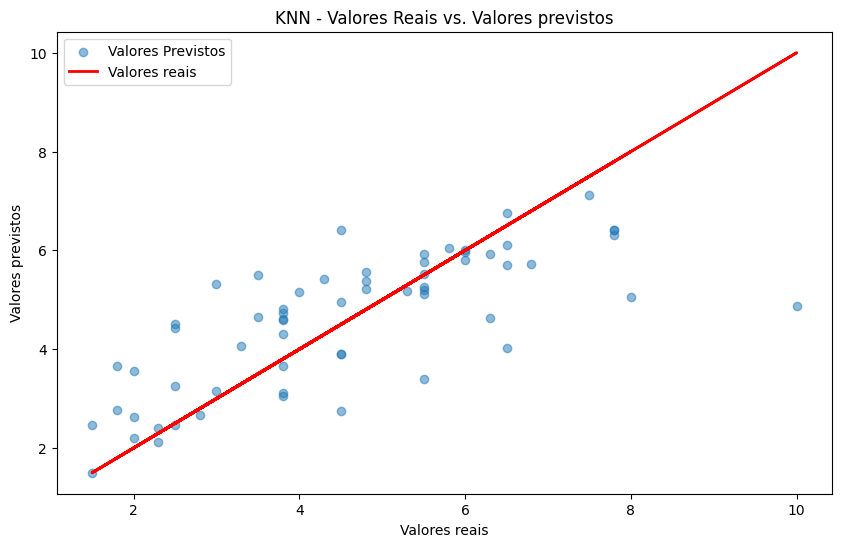

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_teste, y_pred, alpha=0.5, label='Valores Previstos')

plt.plot(y_teste, y_teste, color='red', label='Valores reais', linewidth=2)

plt.title('KNN - Valores Reais vs. Valores previstos')
plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')
plt.legend()
plt.show()

N√£o h√° padr√£o evidente nas previs√µes, o que pode indicar o bom desempenho do modelo. Entretanto, considerando a pequena quantidade de dados analisados, n√£o √© poss√≠vel ter certeza em rela√ß√£o ao desempenho. Finalmente, √© poss√≠vel comparar a distribui√ß√£o dos dados reais com os dados previstos pelo modelo.

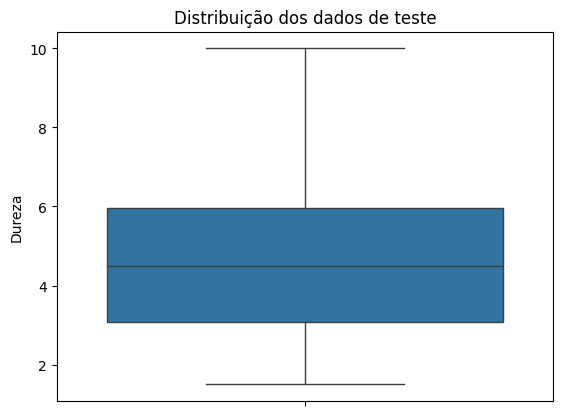

In [17]:
sns.boxplot(y_teste)
plt.title("Distribui√ß√£o dos dados de teste")
plt.ylabel("Dureza")
plt.show()

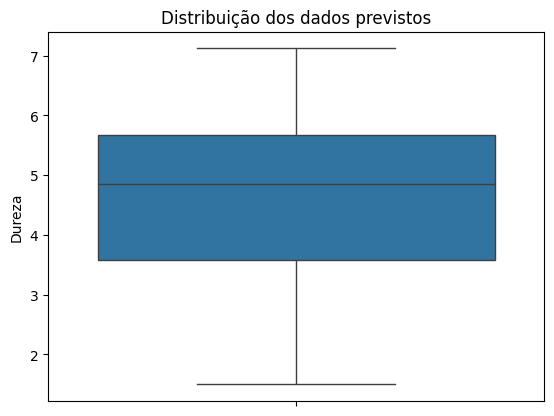

In [18]:
sns.boxplot(y_pred)
plt.title("Distribui√ß√£o dos dados previstos")
plt.ylabel("Dureza")
plt.show()

√â poss√≠vel notar que os dados previstos apresentam uma distribui√ß√£o menor do que a dos dados reais. No entanto, a m√©dia √© bem semelhante nos dois casos, o que pode ser um indicativo de que o modelo foi capaz de capturar bem o padr√£o dos dados.
 
Para a utiliza√ß√£o posterior do modelo, podemos salv√°-lo a partir do m√≥dulo Pickle.

In [19]:
with open("knn.pkl", "wb") as modelo:
    pickle.dump(knn, modelo)
    modelo.close()

A partir desse modelo. √â poss√≠vel estabelecer a fun√ß√£o objetivo, a qual consiste na previs√£o da dureza com base nas *features* do candidato. A fim de automatizar esse processo, a fun√ß√£o ```funcao_objetivo_pop_ag``` ser√° criado, a qual calcula a fun√ß√£o objetivo para cada candidato da popula√ß√£o.

In [20]:
def funcao_objetivo_feature(candidato):
    """Computa a fun√ß√£o objetivo no problema de otimiza√ß√£o da dureza

    Args:
      candidato: uma lista contendo os candidatos para a resolu√ß√£o do problema

    """
    previsao = modelo.predict(np.array(candidato).reshape(1, -1))
    return previsao



def funcao_objetivo_pop_feature(populacao):
    """Computa a fun√ß√£o objetivo para uma popula√ß√£o no problema de otimiza√ß√£o da dureza

    Args:
      populacao: lista contendo os individuos do problema

    """
    fitness = []
    for individuo in populacao:
        fitness.append(funcao_objetivo_feature(individuo))
    return fitness

## üòÅ **Conclus√£o**

Ao final, com base no c√°lculo do RMSE, foi determinado que o k-NN apresentou melhor desempenho do que a √°rvore de decis√£o e, portanto, esse modelo foi escolhido para compor a fun√ß√£o objetivo.                                                                                                                                                                                                        